In [1]:
import plotly.express as px
from IPython.display import display
from ingest_stocks_to_df import IngestStocks
from keras_stock_preprocessing import KerasPreprocess
from model_stock_fit import ModelFit
from model_stock_predict import ModelPredict
from visualize_stocks import VisualizeStocks
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from itertools import cycle
from keras.layers import Dense, GRU
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing import timeseries_dataset_from_array
from keras.utils import model_to_dot, plot_model

# data

In [2]:
stocks_str = 'AAPL'#'GSIT, ICAD, XAIR, LTRN, ARKK, ARKF, ARKW'
ticker_list = [ticker.strip() for ticker in stocks_str.upper().split(',')]
stock_names = ticker_list[0:3]
time_diff_years= 8
column_metric = 'Adj Close'
company_name = 'AAPL'
lookback_length=100
batch_size=30
latest_day=-lookback_length
future_num_days=30
nodes=100
mf = ModelFit
# model=mf.gru_model(nodes=nodes)
model = mf.gru_stacked_model(nodes=nodes)
# model=mf.lstm_dense_model()
# model=mf.stack_3_lstm_model()
# model=mf.bi_stack_lstm_model()


file_name = IngestStocks.get_file_name(ticker_list=ticker_list, time_diff_years=time_diff_years)
# stocks_df = pd.read_pickle(file_name)
stocks_df = IngestStocks.ingest_stocks_to_df(ticker_list=ticker_list, time_diff_years=time_diff_years)
display(stocks_df)
stocks_df.to_pickle(file_name)
plot = VisualizeStocks.add_stocks_fig(stock_names=ticker_list, column_metric=column_metric,stocks_df=stocks_df)

ValueError: Input 0 of layer gru_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 100)

# fit

In [5]:
def main(model=None):
    train_ds, val_ds, test_ds = KerasPreprocess.keras_batch_preprocess(stocks_df=stocks_df, company_name=company_name, metric=column_metric, lookback_length=lookback_length, batch_size=batch_size)
    history, model = mf.train_model(train_data=train_ds, validation_data=val_ds, model=model)
    test_error = ModelPredict.evaluate_model(model, test_ds)
    train_error = pd.DataFrame(history.history)
    prediction_data = KerasPreprocess.get_prediction_data(stocks_df=stocks_df, company_name=company_name, metric=column_metric, lookback_length=lookback_length, latest_day=latest_day)
    predictions = ModelPredict.pred_next_days(future_num_days=future_num_days, previous_days=prediction_data, model=model)
    future_fig = VisualizeStocks.plot_future(predictions=predictions, stocks_df=stocks_df, latest_day=latest_day, future_num_days=future_num_days, company_name=company_name, column_metric=column_metric)
    return future_fig, train_error, test_error, model

Epoch 1/300
36/36 [==============================] - 6s 89ms/step - loss: 184.7513 - mse: 184.7513 - val_loss: 580.9450 - val_mse: 580.9450
Epoch 2/300
36/36 [==============================] - 2s 68ms/step - loss: 25.4027 - mse: 25.4027 - val_loss: 384.3448 - val_mse: 384.3448
Epoch 3/300
36/36 [==============================] - 3s 72ms/step - loss: 59.8532 - mse: 59.8532 - val_loss: 396.2881 - val_mse: 396.2881
Epoch 4/300
36/36 [==============================] - 3s 73ms/step - loss: 57.3445 - mse: 57.3445 - val_loss: 389.6547 - val_mse: 389.6547
Epoch 5/300
36/36 [==============================] - 3s 71ms/step - loss: 57.2033 - mse: 57.2033 - val_loss: 400.4658 - val_mse: 400.4658
Epoch 6/300
36/36 [==============================] - 3s 79ms/step - loss: 57.2537 - mse: 57.2537 - val_loss: 403.5421 - val_mse: 403.5421
Epoch 7/300
36/36 [==============================] - 3s 74ms/step - loss: 53.2748 - mse: 53.2748 - val_loss: 396.1062 - val_mse: 396.1062
Epoch 8/300
36/36 [=============

Epoch 60/300
36/36 [==============================] - 2s 63ms/step - loss: 57.8825 - mse: 57.8825 - val_loss: 393.1400 - val_mse: 393.1400
Epoch 61/300
36/36 [==============================] - 2s 58ms/step - loss: 56.9154 - mse: 56.9154 - val_loss: 401.2794 - val_mse: 401.2794
Epoch 62/300
36/36 [==============================] - 2s 57ms/step - loss: 58.5426 - mse: 58.5426 - val_loss: 385.9792 - val_mse: 385.9792
Epoch 63/300
36/36 [==============================] - 2s 55ms/step - loss: 59.7034 - mse: 59.7034 - val_loss: 395.2245 - val_mse: 395.2245
Epoch 64/300
36/36 [==============================] - 2s 57ms/step - loss: 57.5912 - mse: 57.5912 - val_loss: 393.2907 - val_mse: 393.2907
Epoch 65/300
36/36 [==============================] - 2s 57ms/step - loss: 56.5393 - mse: 56.5393 - val_loss: 393.8959 - val_mse: 393.8959
Epoch 66/300
36/36 [==============================] - 3s 79ms/step - loss: 59.9912 - mse: 59.9912 - val_loss: 254.8236 - val_mse: 254.8236
Epoch 67/300
36/36 [=======

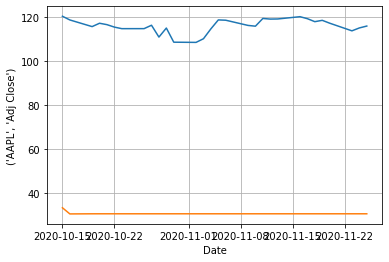

In [7]:
fig, train_error, test_error, model = main()

In [8]:
display(train_error)
display(test_error)
fig = plot_model(model, expand_nested=True)
plt.show()

,loss,mse,val_loss,val_mse
0,170.824173,170.824173,580.945007,580.945007
1,27.567173,27.567173,384.344818,384.344818
2,41.520016,41.520016,396.288116,396.288116
3,41.347115,41.347115,389.654694,389.654694
4,42.529781,42.529781,400.465759,400.465759
...,...,...,...,...
101,52.997608,52.997608,390.191345,390.191345
102,41.397167,41.397167,401.948181,401.948181
103,40.187309,40.187309,398.013245,398.013245
104,40.560528,40.560528,398.336243,398.336243


2812.224365234375

In [33]:
train_ds, val_ds, test_ds = KerasPreprocess.keras_batch_preprocess(stocks_df=stocks_df, company_name=company_name, metric=column_metric, lookback_length=lookback_length, batch_size=batch_size)
predictions = model.predict(test_ds).flatten()
column_list = KerasPreprocess.get_column_list(stocks_df=stocks_df, company_name=company_name, metric=column_metric)
data, targets = KerasPreprocess.get_data_targets_split(column_list=column_list, lookback_length=lookback_length)
data_train, data_val, data_test = KerasPreprocess.train_val_test_split(data)
targets_train, targets_val, targets_test = KerasPreprocess.train_val_test_split(targets)

10/10 [==============================] - 0s 14ms/step - loss: 2812.2244 - mse: 2812.2244


[2812.224365234375, 2812.224365234375]

(283,)

(283,)

<AxesSubplot:>

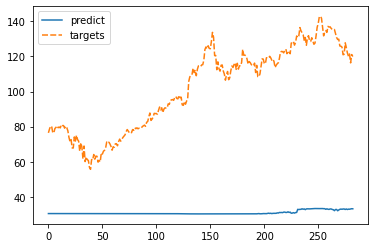

In [38]:
display(model.evaluate(test_ds))
display(predictions[:-1].shape)
display(targets_test[lookback_length:].shape)
results = pd.DataFrame({'predict':predictions[:-1], 'targets':targets_test[lookback_length:]})
sns.lineplot(data=results)